## Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [6]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Encode

In [7]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
GenderMap = {'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(GenderMap)
MarriedMap = {'Yes':1,'No':0}
df['Married'] = df['Married'].map(MarriedMap)
DependentsMap={'3+':3,'2':2,'1':1,'0':0}
df['Dependents'] = df['Dependents'].map(DependentsMap)
EducationMap = {'Graduate':1,'Not Graduate':0}
df['Education'] = df['Education'].map(EducationMap)
Self_EmployedMap = {'Yes':1,'No':0}
df['Self_Employed'] = df['Self_Employed'].map(Self_EmployedMap)
Property_AreaMap = {'Urban':2,'Semiurban':1,'Rural':0}
df['Property_Area'] = df['Property_Area'].map(Property_AreaMap)
Loan_StatusMap = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(Loan_StatusMap)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [8]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value
# df.dropna(axis=0,inplace=True)
# df.info()
# df

In [10]:
for column in list(df.columns[df.isnull().sum() > 0]):
    df[column].fillna(df[column].mean(), inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [11]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.385564,0.475752,1.002718,0.413389,0.339000,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [12]:
df.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.802439,0.588542,0.753008,0.729167,0.142021,5446.078125,1877.807292,150.945488,344.000000,0.562232,1.000000
1,0.818742,0.679986,0.767456,0.805687,0.140380,5384.068720,1504.516398,144.349606,341.090047,0.969577,1.054502


## Data process

In [13]:
import numpy as np

# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

X=df.iloc[:,:-1]
X_MinMax = (X-X.min())/(X.max()-X.min())
print(X_MinMax)
# X_z = (X-X.mean())/X.std()
# print(X_z)
y= df.iloc[:,-1]

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0    0.000000        1.0            0.0         0.070489   
1       1.0      1.0    0.333333        1.0            0.0         0.054830   
2       1.0      1.0    0.000000        1.0            1.0         0.035250   
3       1.0      1.0    0.000000        0.0            0.0         0.030093   
4       1.0      0.0    0.000000        1.0            0.0         0.072356   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0    0.000000        1.0            0.0         0.034014   
610     1.0      1.0    1.000000        1.0            0.0         0.048930   
611     1.0      1.0    0.333333        1.0            0.0         0.097984   
612     1.0      1.0    0.666667        1.0            0.0         0.091936   
613     0.0      0.0    0.000000        1.0            1.0         0.054830   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## Train

In [15]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training

def train(X_train,y_train):
    classifier=LogisticRegression(penalty="l2", gamma=6, fit_intercept=True)
    max_iter = 10000
    iters, cost_list = classifier.fit(X_train,y_train,lr=0.01,tol=1e-7,max_iter=max_iter)
    return classifier,iters, cost_list

In [16]:
def loss_curve(iters,cost_list):
    plt.plot(np.arange(iters),cost_list)
    plt.xlabel('iterations')    # x轴标签
    plt.ylabel('loss')     # y轴标签
    plt.title('Loss curve')
    plt.show()

## Test

In [17]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [18]:
def test(X_train,X_test,classifier):
    X_train_pred = classifier.predict(X_train)
    acc_train=accuracy(X_train_pred,y_train)
    acc_train_list.append(acc_train)
    X_test_pred = classifier.predict(X_test)
    acc_test=accuracy(X_test_pred,y_test)
    acc_test_list.append(acc_test)

第1轮训练：


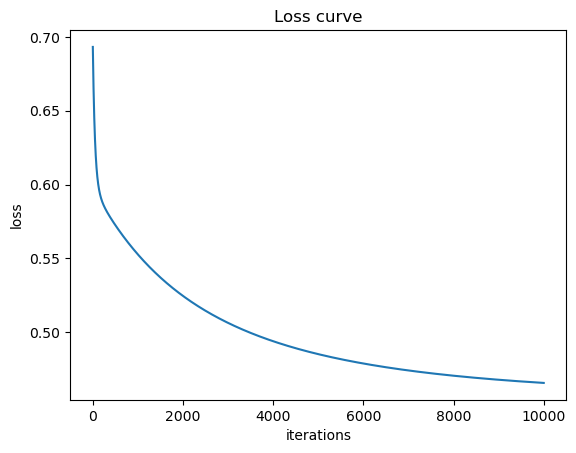

训练集accuracy:  0.8137432188065099
测试集accuracy:  0.7704918032786885
第2轮训练：


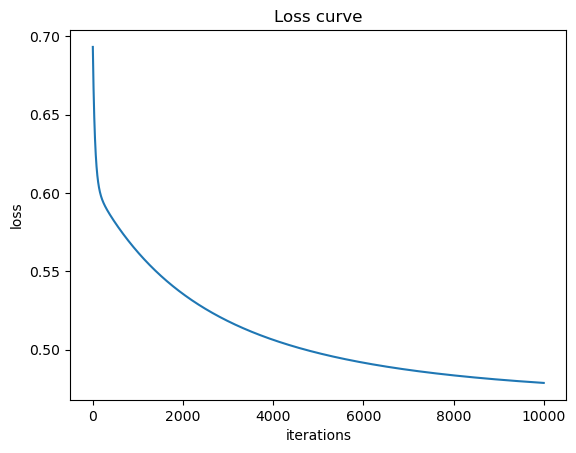

训练集accuracy:  0.8047016274864376
测试集accuracy:  0.8524590163934426
第3轮训练：


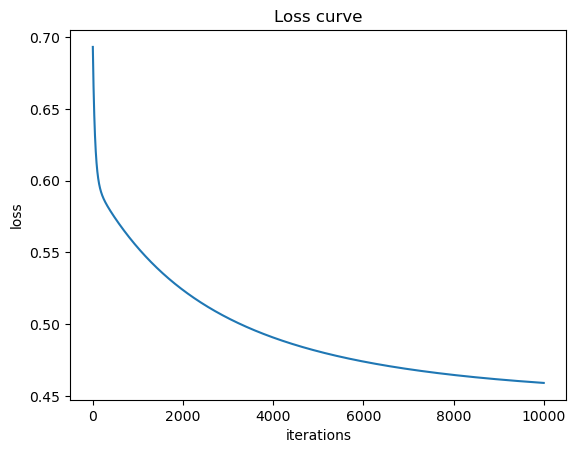

训练集accuracy:  0.8155515370705244
测试集accuracy:  0.7540983606557377
第4轮训练：


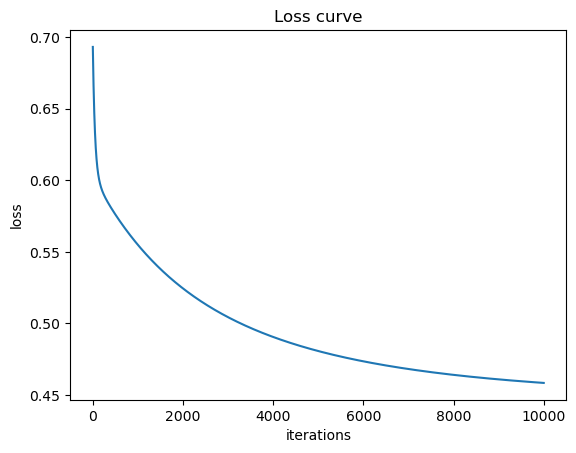

训练集accuracy:  0.8137432188065099
测试集accuracy:  0.7704918032786885
第5轮训练：


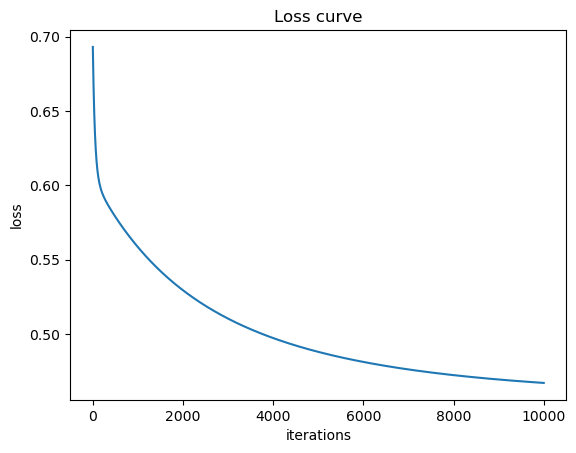

训练集accuracy:  0.810126582278481
测试集accuracy:  0.8032786885245902
第6轮训练：


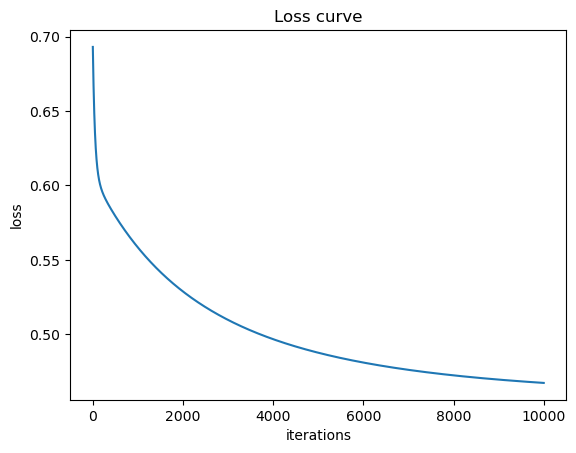

训练集accuracy:  0.810126582278481
测试集accuracy:  0.8032786885245902
第7轮训练：


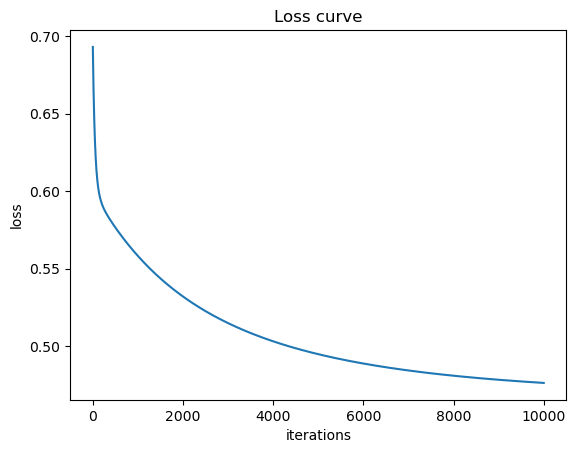

训练集accuracy:  0.8065099457504521
测试集accuracy:  0.8360655737704918
第8轮训练：


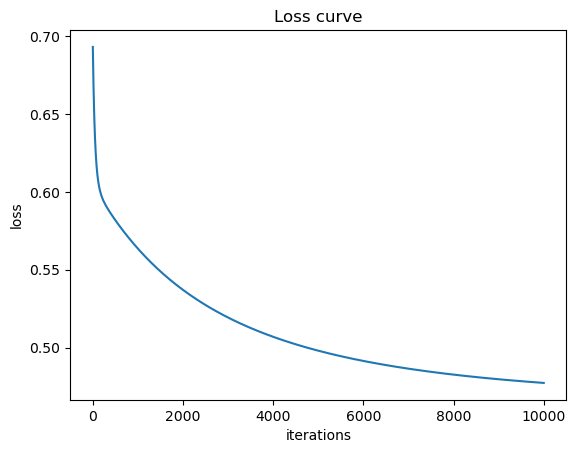

训练集accuracy:  0.8028933092224232
测试集accuracy:  0.8688524590163934
第9轮训练：


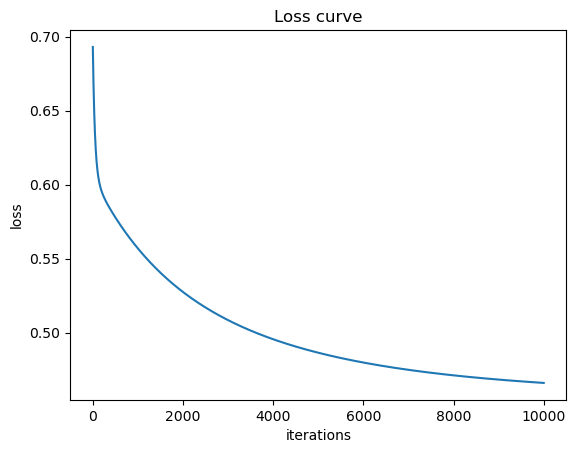

训练集accuracy:  0.8119349005424955
测试集accuracy:  0.7868852459016393
第10轮训练：


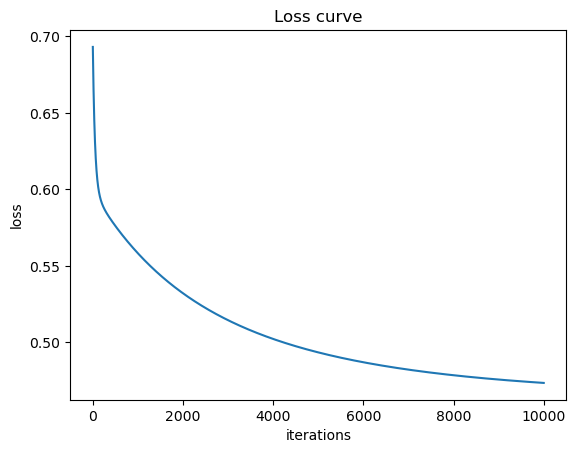

训练集accuracy:  0.8065099457504521
测试集accuracy:  0.8360655737704918

训练集平均accuracy:  0.8081967213114754
测试集平均accuracy:  0.8095840867992766


In [19]:
# k_folds cross validate
k = 10
fold =int(len(df)/k)
acc_train_list = []
acc_test_list = []
for i in range(k):
    X_train = pd.concat([X_MinMax[:i*fold],X_MinMax[(i+1)*fold:]], axis=0, ignore_index=False)
    y_train = pd.concat([y[:i*fold],y[(i+1)*fold:]], axis=0, ignore_index=False)
    X_test=X_MinMax.iloc[i*fold:(i+1)*fold].values
    y_test=y.iloc[i*fold:(i+1)*fold].values
    classifier,iters, cost_list = train(X_train,y_train)
    test(X_train,X_test,classifier)
    print("第%d轮训练："%(i+1))
    loss_curve(iters, cost_list)
    print("训练集accuracy: ",acc_train_list[i])
    print("测试集accuracy: ",acc_test_list[i])
print("\n训练集平均accuracy: ",np.mean(acc_test_list))
print("测试集平均accuracy: ",np.mean(acc_train_list))